In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_68983_I')

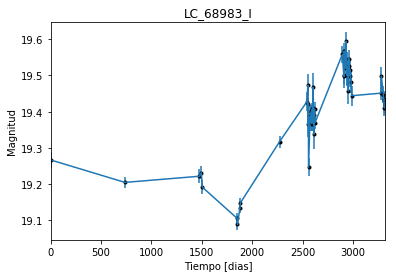

In [2]:
data = np.genfromtxt('LC_68983_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_68983_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

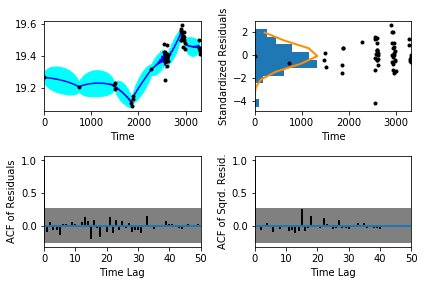

In [5]:
sample.assess_fit()

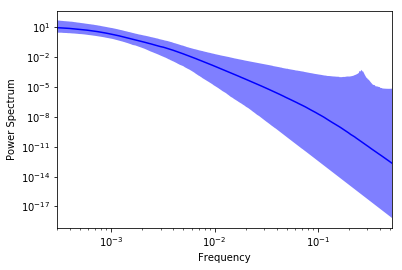

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_68983_I')

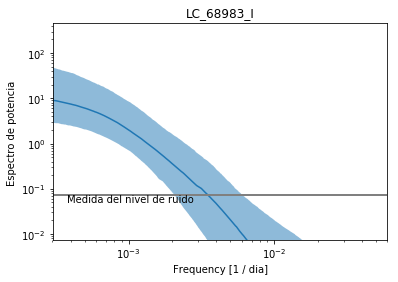

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_68983_I')

Text(0.5,1,'Prediccion , valor esperado LC_68983_I')

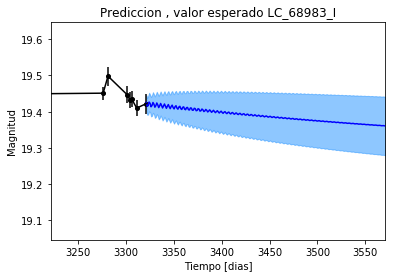

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_68983_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_68983_I')

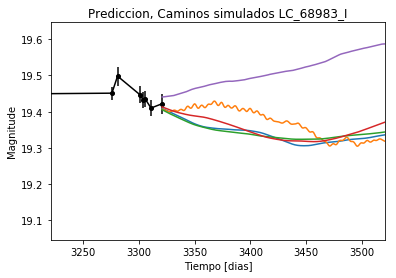

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_68983_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_68983_I')

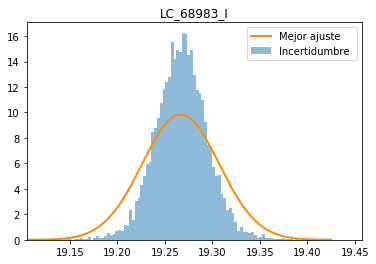

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_68983_I')

Text(0.5,1,'Interpolacion, camino simulado LC_68983_I')

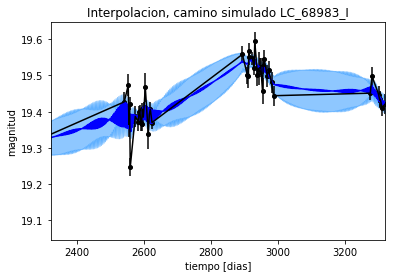

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68983_I')

Text(0.5,1,'Interpolacion, camino simulado LC_68983_I')

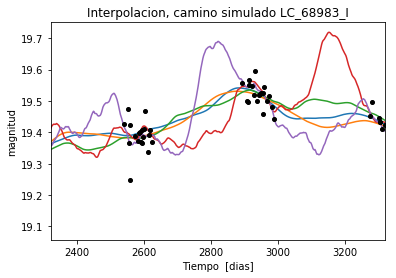

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68983_I')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 630.956028157
Median: 0.00857243247334
Standard deviation: 0.206233431938
68% credibility interval: [ 0.00121587  0.17323363]
95% credibility interval: [  3.88579132e-04   8.46003176e-01]
99% credibility interval: [  3.15492100e-04   9.89885533e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 439.969130052
Median: 0.00165376282957
Standard deviation: 0.0582827003615
68% credibility interval: [ 0.00044885  0.0102068 ]
95% credibility interval: [ 0.00031513  0.14369822]
99% credibility interval: [  3.03591834e-04   4.50174950e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 452.413428385
Median: 0.0221932854684
Standard

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 155.849618469
Median: 110.820236545
Standard deviation: 2.26957817826
68% credibility interval: [ 109.0902074   112.12037146]
95% credibility interval: [ 106.64012921  117.24218191]
99% credibility interval: [ 104.58182271  117.24218191]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2829.10735316
Median: 0.878361147761
Standard deviation: 1.96293342558
68% credibility interval: [ 0.06269275  3.55513339]
95% credibility interval: [ 0.01644789  6.49514656]
99% credibility interval: [ 0.01044724  9.22400734]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 173.524010416
Median: 0.329264662574
Standard deviation: 8.24113959494
68% credibility interval: [ 0.01257082  9.21005697]
95% credibility interval: [  9.10797314e-0

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0513102
Median: 6.18701194989e-55
Standard deviation: 6.6108172022e+110
68% credibility interval: [  1.05929768e-96   2.52182799e-11]
95% credibility interval: [  7.05287024e-121   1.22090448e+006]
99% credibility interval: [  1.79457856e-129   1.27166328e+056]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3064.55659509
Median: 19.2967599428
Standard deviation: 0.0718329017925
68% credibility interval: [ 19.24292436  19.35871475]
95% credibility interval: [ 19.15034222  19.44796229]
99% credibility interval: [ 19.0543392   19.52346313]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 131.792696705
Median: 0.00147108369386
Standard deviation: 0.258882358522
68% credibility interval: [ 0.         0.3991479]
95% credibility interval: [ 0.          0.76344786]
99% credibility interval: [ 0.          1.01120479]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 131.792696705
Median: 0.00147108369386
Standard deviation: 0.258882358522
68% credibility interval: [ 0.         0.3991479]
95% credibility interval: [ 0.          0.76344786]
99% credibility interval: [ 0.          1.01120479]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1144.62011387
Median: 0.0
Standard deviation: 0.000258312491301
68% cred

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 155.849618469
Median: 110.820236545
Standard deviation: 2.26957817826
68% credibility interval: [ 109.0902074   112.12037146]
95% credibility interval: [ 106.64012921  117.24218191]
99% credibility interval: [ 104.58182271  117.24218191]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1429.79446179
Median: 0.0175452282219
Standard deviation: 0.0238242298712
68% credibility interval: [ 0.0096857   0.03479416]
95% credibility interval: [ 0.00692336  0.07968543]
99% credibility interval: [ 0.00494177  0.15035295]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 221.710223437
Median: 1.50524712877
Standard deviation: 0.249421081168
68% credibility interval: [ 1.25051525  1.74608541]
95% credibility interval: [ 1.00065617  1.93020422]
99% credibility interval: [ 0.82597256  1.98451611]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 102.025536295
Median: 4.87224210898e-05
Standard deviation: 0.120592982964
68% credibility interval: [  9.82130502e-07   4.67094964e-03]
95% credibility interval: [  1.29482674e-11   4.13033145e-01]
99% credibility interval: [  4.33372810e-60   5.33519476e-01]


In [26]:
sample.posterior_summaries('ar_roots')


Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 630.956028157
Median: (-0.0538621817633-0.101671700972j)
Standard deviation: 2.07965179945
68% credibility interval: [-1.08845899+0.j -0.00763953+0.j]
95% credibility interval: [ -5.31559473e+00+0.j          -2.44151469e-03-0.02269965j]
99% credibility interval: [ -6.21963424e+00+0.j          -1.98229533e-03-3.54031012j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 439.969130052
Median: (-0.0103908983123+0.0292356275424j)
Standard deviation: 1.66731811836
68% credibility interval: [-0.06413125+0.60401389j -0.00282019+0.03816092j]
95% credibility interval: [-0.90288257+4.11245691j -0.00198003+0.j        ]
99% credibility interval: [ -2.82853263e+00 +4.97955492e+00j  -1.90752375e-03 +3.42379303e-03j]
Posterior summary